## Data Understanding

### Initial Overview

In [1]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as stats

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [10]:
path = "data/kip_sdm_syn.csv"
df = pd.read_csv(path, sep=",")

In [11]:
%matplotlib inline

In [ ]:
AV = AutoViz_Class()

# Load the dataset and generate visualizations
AV.AutoViz(df)

In [4]:
df.columns

Index(['fallen', 'id', 'age', 'procedure', 'diagnosis', 'c_zriserh1',
       'decubitus-admission', 'decubitus-at_the_moment',
       'bed_mobility-impairment', 'bed_mobility-jones',
       'bed_mobility-skin_condition', 'transfer-impairment', 'transfer',
       'medical_items', 'medical_items-arm_or_leg_splint',
       'medical_items-A_V_system', 'medical_items-plaster_or_neck_brace',
       'medical_items-compression_stocking', 'medical_items-ventilation_mask',
       'medical_items-O2_glasses', 'medical_items-orthesis',
       'medical_items-prosthesis',
       'medical_items-skin_condition_at_item_application',
       'fall-last_12_month', 'fall-how_many_last_12_month', 'fall-while_stay',
       'fall-while_transfer', 'walk-impairment', 'walk-jones',
       'walk-balance_and_gait_impaired', 'walking_aid',
       'excretions-impairment', 'excretions-incontinence',
       'excretions-nykturie', 'cognition-impairment',
       'cognition-disoriented_time', 'cognition-disoriented_locati

## Identify Variables with high correlation

### Creating Dummies

In [12]:
df['transfer'] = df['transfer'].fillna('Unknown')
df = pd.get_dummies(df, columns=['transfer'])


In [13]:
df['bed_mobility-jones'] = df['bed_mobility-jones'].fillna('Unknown')
df = pd.get_dummies(df, columns=['bed_mobility-jones'])

In [14]:
df['walk-jones'] = df['walk-jones'].fillna('Unknown')
df = pd.get_dummies(df, columns=['walk-jones'])

In [15]:
df['decubitus-risk'] = df['decubitus-risk'].fillna('Unknown')
df = pd.get_dummies(df, columns=['decubitus-risk'])

In [16]:
df['fall-risk'] = df['fall-risk'].fillna('Unknown')
df = pd.get_dummies(df, columns=['fall-risk'])

In [17]:
df['procedure'] = df['procedure'].fillna('Unknown')
df = pd.get_dummies(df, columns=['procedure'])

In [18]:
df['diagnosis'] = df['diagnosis'].fillna('Unknown')
df = pd.get_dummies(df, columns=['diagnosis'])

In [19]:
df['sex'] = df['sex'].fillna('Unknown')
df = pd.get_dummies(df, columns=['sex'])

In [20]:
df.info

<bound method DataFrame.info of        fallen    id    age  c_zriserh1 decubitus-admission  \
0       False  179020  39      False             NaN         
1       False  112009  29      False           False         
2       False   54403  29      False             NaN         
3       False   13054  64       True             NaN         
4       False   45770  89      False             NaN         
...       ...     ...  ...         ...                 ...   
39995   False   89687  39      False             NaN         
39996   False  173073  49      False           False         
39997   False   41549  74      False           False         
39998   False  464294  59      False             NaN         
39999   False   85918  39      False             NaN         

      decubitus-at_the_moment bed_mobility-impairment  \
0                 NaN                     NaN           
1                 NaN                     NaN           
2               False                     NaN       

In [21]:
df.head()

,fallen,id,age,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-skin_condition,transfer-impairment,medical_items,medical_items-arm_or_leg_splint,medical_items-A_V_system,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,medical_items-orthesis,medical_items-prosthesis,medical_items-skin_condition_at_item_application,fall-last_12_month,fall-how_many_last_12_month,fall-while_stay,fall-while_transfer,walk-impairment,walk-balance_and_gait_impaired,walking_aid,excretions-impairment,excretions-incontinence,excretions-nykturie,cognition-impairment,cognition-disoriented_time,cognition-disoriented_location,cognition-disoriented_own_person,cognition-agitated,cognition-confused,psychotropic_or_sedatives_drugs,diseases,transfer_1,transfer_2,transfer_3,transfer_4A,transfer_4B,transfer_Unknown,bed_mobility-jones_1,bed_mobility-jones_2,bed_mobility-jones_3,bed_mobility-jones_4A,bed_mobility-jones_4B,bed_mobility-jones_Unknown,walk-jones_1,walk-jones_2,walk-jones_3,walk-jones_4A,walk-jones_4B,walk-jones_Unknown,decubitus-risk_+,decubitus-risk_++,decubitus-risk_0,decubitus-risk_Unknown,fall-risk_+,fall-risk_++,fall-risk_0,fall-risk_Unknown,procedure_0,procedure_1-10,procedure_1-20,procedure_1-22,procedure_1-24,procedure_1-26,procedure_1-27,procedure_1-31,procedure_1-33,procedure_1-40,procedure_1-41,procedure_1-42,procedure_1-43,procedure_1-44,procedure_1-46,procedure_1-47,procedure_1-48,procedure_1-49,procedure_1-50,procedure_1-51,procedure_1-52,procedure_1-53,procedure_1-54,procedure_1-55,procedure_1-56,procedure_1-57,procedure_1-58,procedure_1-61,procedure_1-62,procedure_1-63,procedure_1-64,procedure_1-65,procedure_1-66,procedure_1-67,procedure_1-69,procedure_1-70,procedure_1-71,procedure_1-76,procedure_1-77,procedure_1-79,procedure_1-84,procedure_1-85,procedure_1-90,procedure_1-91,procedure_1-92,procedure_1-93,procedure_1-94,procedure_3-03,procedure_3-05,procedure_3-10,procedure_3-13,procedure_3-20,procedure_3-22,procedure_3-30,procedure_3-31,procedure_3-60,procedure_3-61,procedure_3-70,procedure_3-72,procedure_3-73,procedure_3-75,procedure_3-76,procedure_3-80,procedure_3-82,procedure_3-84,procedure_3-90,procedure_3-99,procedure_5-01,procedure_5-02,procedure_5-03,procedure_5-04,procedure_5-05,procedure_5-06,procedure_5-07,procedure_5-08,procedure_5-09,procedure_5-10,procedure_5-11,procedure_5-12,procedure_5-13,procedure_5-14,procedure_5-15,procedure_5-16,procedure_5-18,procedure_5-19,procedure_5-20,procedure_5-21,procedure_5-22,procedure_5-23,procedure_5-24,procedure_5-25,procedure_5-26,procedure_5-27,procedure_5-28,procedure_5-29,procedure_5-30,procedure_5-31,procedure_5-32,procedure_5-33,procedure_5-34,procedure_5-35,procedure_5-36,procedure_5-37,procedure_5-38,procedure_5-39,procedure_5-40,procedure_5-41,procedure_5-42,procedure_5-43,procedure_5-44,procedure_5-45,procedure_5-46,procedure_5-47,procedure_5-48,procedure_5-49,procedure_5-50,procedure_5-51,procedure_5-52,procedure_5-53,procedure_5-54,procedure_5-55,procedure_5-56,procedure_5-57,procedure_5-58,procedure_5-59,procedure_5-60,procedure_5-61,procedure_5-62,procedure_5-63,procedure_5-64,procedure_5-65,procedure_5-66,procedure_5-67,procedure_5-68,procedure_5-69,procedure_5-70,procedure_5-71,procedure_5-72,procedure_5-73,procedure_5-74,procedure_5-75,procedure_5-76,procedure_5-77,procedure_5-78,procedure_5-79,procedure_5-80,procedure_5-81,procedure_5-82,procedure_5-83,procedure_5-84,procedure_5-85,procedure_5-86,procedure_5-87,procedure_5-88,procedure_5-89,procedure_5-90,procedure_5-91,procedure_5-93,procedure_5-98,procedure_6-00,procedure_8-01,procedure_8-02,procedure_8-03,procedure_8-10,procedure_8-11,procedure_8-12,procedure_8-13,procedure_8-14,procedure_8-15,procedure_8-17,procedure_8-19,procedure_8-39,procedure_8-50,procedure_8-51,procedure_8-52,procedure_8-53,procedure_8-54,procedure_8-55,procedure_8-56,procedure_8-60,procedure_8-63,procedure_8-64,procedure_8-7

In [22]:
df["diagnosis_T780"].value_counts()

diagnosis_T780
False    39997
True         3
Name: count, dtype: int64

The dummy-variables for the diagnosis and and procedure create many dimensions. Lets check how they are correlated with the target variable. 

In [23]:
pd.set_option('display.max_rows', 100)

### Computing Correlation

#### Continuous variables will be computed with Pearson Correlation

Quick comment: Computing correlation between continuous variables and binary (fallen) is trickier than I thought. Becomes even more trickier when variable is not normal, which is the case for "fall-how_many_last_12_month". Becomes EVEN more tricker if the target is heavily skewed. Also we have to keep in midn the small sample size to compute the correlation for some variables due to the high sparsity. Ask GPT for more info. We have to start somehwere though. Just take the results with a grain of salt. This might explain why age has little correlation here despite Rahels' comment that it should be highly correlated.

In [24]:
df['age'].corr(df['fallen'], method='pearson')

np.float64(0.0610795874402941)

In [25]:
df['fall-how_many_last_12_month'].corr(df['fallen'], method='pearson')

np.float64(0.19839728689176075)

#### Binary Variables will be computed with Phi-Coefficient correlation

In [26]:
def phi_coefficient(df, var, target="fallen"):
    contingency_table = pd.crosstab(df[var], df[target])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = df.shape[0]
    return np.sqrt(chi2 / n)

binary_vars = [col for col in df.columns if df[col].nunique() == 2]  # Identify binary columns
phi_corrs = {var: phi_coefficient(df, var) for var in binary_vars}

# Sort by absolute correlation value
sorted_phi_corrs = sorted(phi_corrs.items(), key=lambda x: abs(x[1]), reverse=True)

In [27]:
print(sorted_phi_corrs[:20]) 

[('fallen', np.float64(0.9947243123470876)), ('walk-balance_and_gait_impaired', np.float64(0.2544253300451488)), ('excretions-incontinence', np.float64(0.16817591552775144)), ('fall-risk_+', np.float64(0.15228158664320582)), ('walk-jones_1', np.float64(0.13772507857936855)), ('fall-while_stay', np.float64(0.12343166837237611)), ('walking_aid', np.float64(0.10305135534987699)), ('cognition-agitated', np.float64(0.10008239657712259)), ('decubitus-risk_+', np.float64(0.09767490432109562)), ('excretions-impairment', np.float64(0.09756496858687992)), ('cognition-impairment', np.float64(0.09459997362940999)), ('transfer-impairment', np.float64(0.08378623664469496)), ('fall-while_transfer', np.float64(0.08306222833992838)), ('cognition-disoriented_time', np.float64(0.08186995811549992)), ('walk-impairment', np.float64(0.08021941492403456)), ('bed_mobility-impairment', np.float64(0.07952458499320773)), ('walk-jones_Unknown', np.float64(0.07919135202772459)), ('fall-last_12_month', np.float64(0

In [21]:
df["walk-balance_and_gait_impaired"].value_counts()

walk-balance_and_gait_impaired
False    38596
True      1404
Name: count, dtype: int64

In [22]:
df["excretions-incontinence"].value_counts()

excretions-incontinence
False    39272
True       728
Name: count, dtype: int64

In [23]:
df["fall-while_stay"].value_counts()

fall-while_stay
False    2719
True       69
Name: count, dtype: int64

In [35]:
df["walking_aid"].value_counts()

walking_aid
False    39067
True       933
Name: count, dtype: int64

In [36]:
df['cognition-agitated'].value_counts()

cognition-agitated
False    39909
True        91
Name: count, dtype: int64

In [37]:
df['excretions-impairment'].value_counts()

excretions-impairment
False    9314
True      769
Name: count, dtype: int64

In [29]:
df["fall-how_many_last_12_month"].value_counts()

fall-how_many_last_12_month
1.000000    1122
5.000000     249
3.000000      11
2.000000       3
4.453497       1
2.202339       1
2.013521       1
4.096168       1
4.396037       1
1.257659       1
3.241220       1
3.392226       1
2.981188       1
3.659762       1
3.871862       1
3.100813       1
4.931584       1
2.748724       1
4.175363       1
Name: count, dtype: int64

'fall-while_stay', 'fall-how_many_last_12_month', 'excretions-impairment' will need to be imputed due to sparsity. Lets start with 'fall-how_many_last_12_month'.

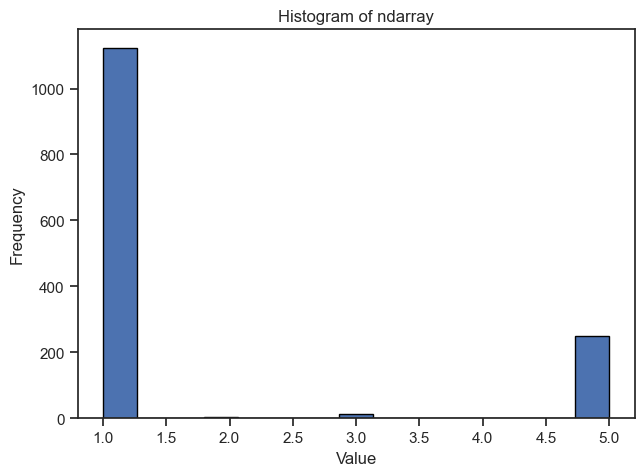

In [34]:
plt.hist(df["fall-how_many_last_12_month"], bins=15, edgecolor='black')  # Increase bins for finer granularity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ndarray")
plt.show()

Try hot-deck imputation and 'Unknown'. Also try to create feautures for similar categories (cognition, excretions, walk-impairment) to achievee higher correlations.

In [44]:
correlations = df.corrwith(df["fallen"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

fallen                                              1.000000
fall-while_stay                                     0.479318
medical_items-skin_condition_at_item_application    0.322410
walk-balance_and_gait_impaired                      0.255821
fall-how_many_last_12_month                         0.202856
excretions-impairment                               0.196862
cognition-impairment                                0.192049
excretions-incontinence                             0.170097
transfer-impairment                                 0.158168
fall-while_transfer                                 0.156993
fall-risk_+                                         0.153170
bed_mobility-impairment                             0.152331
fall-last_12_month                                  0.150537
walk-impairment                                     0.146825
walk-jones_1                                        0.140071
cognition-agitated                                  0.105473
walking_aid             

The varaibles with the highest correlation are very sparse. Lets try to impute them with a model. To check whether this is achievable we look at the correlation between all the variables and the varibel that is to be imputed.

### Creating Correlation Matrix with target that is to be imputed

In [45]:
correlations = df.corrwith(df["fall-while_stay"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

fall-while_stay                                     1.000000
bed_mobility-skin_condition                         0.765747
medical_items-skin_condition_at_item_application    0.656140
decubitus-at_the_moment                             0.540905
excretions-impairment                               0.482140
fallen                                              0.479318
walk-balance_and_gait_impaired                      0.472672
transfer-impairment                                 0.447844
cognition-impairment                                0.444860
fall-while_transfer                                 0.439008
fall-risk_+                                         0.408964
diseases                                            0.401086
excretions-incontinence                             0.390210
walk-impairment                                     0.387739
cognition-agitated                                  0.380630
bed_mobility-impairment                             0.380144
fall-how_many_last_12_mo

In [46]:
correlations = df.corrwith(df["medical_items-skin_condition_at_item_application"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

medical_items-skin_condition_at_item_application    1.000000
bed_mobility-skin_condition                         0.761812
decubitus-at_the_moment                             0.760195
fall-while_stay                                     0.656140
bed_mobility-impairment                             0.473211
medical_items                                       0.450092
transfer-impairment                                 0.410209
fall-while_transfer                                 0.403016
fall-risk_+                                         0.375839
medical_items-O2_glasses                            0.374639
walk-impairment                                     0.360180
decubitus-risk_+                                    0.350720
fallen                                              0.322410
walk-balance_and_gait_impaired                      0.290662
procedure_5-21                                      0.261482
procedure_1-94                                      0.227895
diagnosis_K227          

Unfortunately the most correlated features for "fall-while_stay" and "medical_items-skin_condition_at_item_application", e.g. "bed_mobility-skin_condition" or "decubitus-at_the_moment" are very sparse themselves. This makes it unfeasible to predict them properly. Lets try to create a dummy variable "Unknownw" for cases in which there are NANs in the columns "fall-while_stay" and "medical_items-skin_condition_at_item_application".

In [ ]:
df["decubitus-admission"].value_counts()

decubitus-admission
False    9399
Name: count, dtype: int64

In [ ]:
df["transfer"].value_counts()

transfer
2     2230
3      492
4A     178
1       96
4B      10
Name: count, dtype: int64